In [ ]:
#Menghubungkan Google Colab dengan Google Drive :
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Basic Computation
import pandas as pd #untuk menampilkan fitur fitur
import os #pengolahan folder

In [ ]:
def load_images_from_folder(folder,only_path = False, label = ""):
    if only_path == False:
        images = []
        for filename in os.listdir(folder):
            img = plt.imread(os.path.join(folder,filename))
            if img is not None:
                images.append(img)
        return images
    else:
        path = []
        for filename in os.listdir(folder):
            img_path = os.path.join(folder,filename)
            if img_path is not None:
                path.append([label,img_path])
        return path

In [ ]:
images = []
dirp = "/content/drive/MyDrive/Musroom/"
for f in os.listdir(dirp):
    images += load_images_from_folder(dirp+f,True,label = f)

# membuat data frame
df = pd.DataFrame(images, columns = ["Jamur", "path"])
df.head()

,Jamur,path
0,Cantharellus,/content/drive/MyDrive/Musroom/Cantharellus/35...
1,Cantharellus,/content/drive/MyDrive/Musroom/Cantharellus/58...
2,Cantharellus,/content/drive/MyDrive/Musroom/Cantharellus/36...
3,Cantharellus,/content/drive/MyDrive/Musroom/Cantharellus/34...
4,Cantharellus,/content/drive/MyDrive/Musroom/Cantharellus/33...


In [ ]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

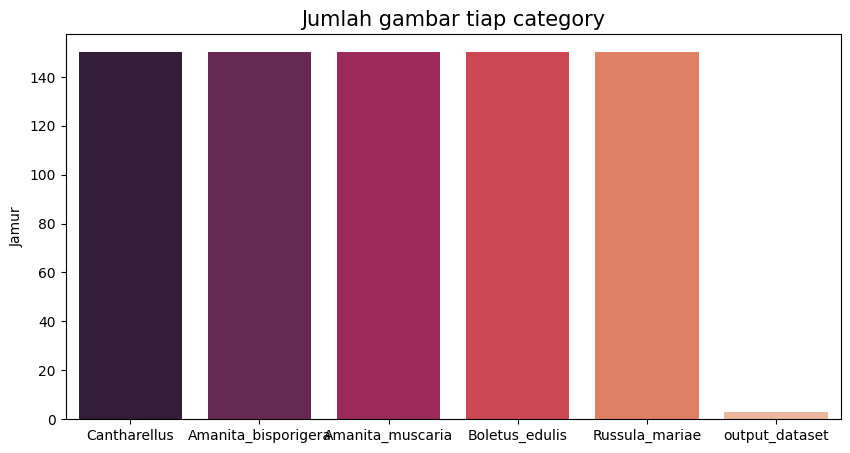

In [ ]:
# menampilkan jumlah gambar pada tiap category
vc = df["Jamur"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Jumlah gambar tiap category", fontsize = 15)
plt.show()

In [ ]:
print("Jumlah Data Jamur Perkelas :")
print('Jumlah Data kelas Amanita Bigporigera  :', len(os.listdir(dirp +'Amanita_bisporigera/')))
print('Jumlah Data kelas Amanita Muscaria  :   :', len(os.listdir(dirp +'Amanita_muscaria/')))
print('Jumlah Data kelas Boletus Edulis :    :', len(os.listdir(dirp +'Boletus_edulis/')))
print('Jumlah Data kelas Canharus :  :', len(os.listdir(dirp +'Cantharellus/')))
print('Jumlah Data kelas Rusulla Marie :     :', len(os.listdir(dirp +'Russula_mariae/')))

Jumlah Data Jamur Perkelas :
Jumlah Data kelas Amanita Bigporigera  : 150
Jumlah Data kelas Amanita Muscaria  :   : 150
Jumlah Data kelas Boletus Edulis :    : 150
Jumlah Data kelas Canharus :  : 150
Jumlah Data kelas Rusulla Marie :     : 150


In [ ]:
## install library untuk pembagian dataset menjadi 3 yaitu train,test,val
!pip install split_folders
## install library untuk pembagian dataset menjadi 3 yaitu train,test,val
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# pembagian dataset menjadi 3 yaitu train,test,val
#input_folders = '/content/drive/MyDrive/Musroom'
#output_folders = '/content/drive/MyDrive/Musroom/output_dataset'
#splitfolders.ratio(input_folders,output_folders, seed =42, ratio=(.7,.2,.1))

In [ ]:
# Deklarasi  Libraries
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Sequential
from keras import models, layers, optimizers
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model


Arsitektur Vgg16

In [ ]:
#Import arsitektur VGG16
from keras.applications.vgg16 import VGG16

In [ ]:
#membuat include top false supaya bisa mengatur kelas sesuai kelas yang dibutuhkan
base_model = tf.keras.applications.VGG16(
    include_top=False,
    input_shape=(224,224,3),
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Mengunci semua layer base_model agar tidak terupdate selama pelatihan
for layer in base_model.layers:
    layer.trainable = False

# Membuat output layer kustom untuk jumlah kelas yang diinginkan
x = Flatten()(base_model.output)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
x = Dense(5, activation='softmax')(x)

# Menggabungkan base model dengan output layer kustom
model = Model(inputs=base_model.input, outputs=x)

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

**Preprocessing**

In [ ]:
# path data train dan data validation dari hasil split dataset
val_path ='/content/drive/MyDrive/Musroom/output_dataset/val'
training_path ='/content/drive/MyDrive/Musroom/output_dataset/train'

# path data testing
testing_path ='/content/drive/MyDrive/Musroom/output_dataset/test'

In [ ]:
# Inisialisasi ImageDataGenerator dengan beberapa parameter augmentasi, untuk melakukan berbagai transformasi pada gambar, # deklarasi
train_datagen = ImageDataGenerator (rescale = 1./255,
                                    zoom_range = 0.2,
                                    rotation_range = 20)

valid_datagen = ImageDataGenerator(rescale = 1./255)
testing_datagen = ImageDataGenerator(rescale=1./255)

Hyperparameter

In [ ]:
# Compile the Model #Untuk menghitung nilai loss
model.compile( loss='sparse_categorical_crossentropy',
               optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
               metrics=['accuracy'])

In [ ]:
 #penerapan preprocessing
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Musroom/output_dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'sparse')
#sparse berati label yang dihasilkan akan berupa bilangan bulat yang merepresentasikan kelas masing-masing

Found 525 images belonging to 5 classes.


In [ ]:
valid_set = valid_datagen.flow_from_directory('/content/drive/MyDrive/Musroom/output_dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'sparse')

Found 150 images belonging to 5 classes.


In [ ]:
testing_set = testing_datagen.flow_from_directory('/content/drive/MyDrive/Musroom/output_dataset/test',
                                                target_size=(224,224),
                                                batch_size=64,
                                                class_mode='sparse', shuffle=False)

Found 75 images belonging to 5 classes.


**Training** CNN dengan Arsitektur VGG16

In [ ]:
# Fit the model untuk training model
r = model.fit(
              training_set,
              validation_data=valid_set,
              epochs=100,
              steps_per_epoch=len(training_set),
              validation_steps=len(valid_set))

Epoch 1/100
9/9 [==============================] - 154s 16s/step - loss: 12.8736 - accuracy: 0.2610 - val_loss: 1.2236 - val_accuracy: 0.5133
Epoch 2/100
9/9 [==============================] - 11s 1s/step - loss: 2.0058 - accuracy: 0.4400 - val_loss: 2.4099 - val_accuracy: 0.5600
Epoch 3/100
9/9 [==============================] - 11s 1s/step - loss: 2.0779 - accuracy: 0.4648 - val_loss: 1.4626 - val_accuracy: 0.6200
Epoch 4/100
9/9 [==============================] - 11s 1s/step - loss: 0.8714 - accuracy: 0.6895 - val_loss: 1.6148 - val_accuracy: 0.4933
Epoch 5/100
9/9 [==============================] - 11s 1s/step - loss: 2.0718 - accuracy: 0.5029 - val_loss: 1.9788 - val_accuracy: 0.4533
Epoch 6/100
9/9 [==============================] - 10s 1s/step - loss: 1.1274 - accuracy: 0.6610 - val_loss: 1.2602 - val_accuracy: 0.5800
Epoch 7/100
9/9 [==============================] - 11s 1s/step - loss: 0.8767 - accuracy: 0.6838 - val_loss: 1.3365 - val_accuracy: 0.5733
Epoch 8/100
9/9 [=======

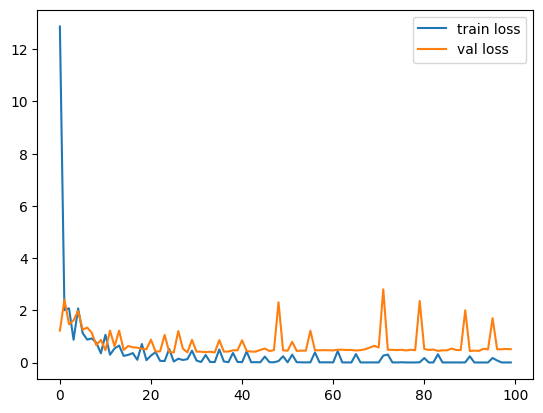

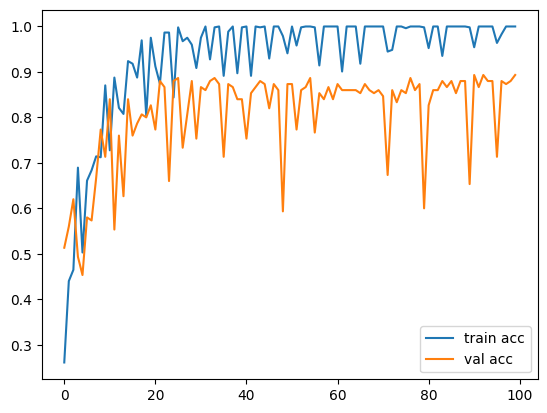

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
scores_validasi = model.evaluate(valid_set)

3/3 [==============================] - 1s 281ms/step - loss: 0.5101 - accuracy: 0.8933


In [ ]:
scores_train = model.evaluate(training_set)

9/9 [==============================] - 10s 1s/step - loss: 9.9699e-04 - accuracy: 1.0000


In [ ]:
#save model
model.save("/content/drive/MyDrive/Model/P30.h5")

In [ ]:
model.save("/content/drive/MyDrive/Model/P30.hdf5")

In [ ]:
# metric evaluasi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
my_model = tf.keras.models.load_model("/content/drive/MyDrive/Model/P30.hdf5", compile = True)

In [ ]:
# mmenghitung jumlah epoch
import re, glob, numpy as np
test_steps_per_epoch = np.math.ceil(testing_set.samples / testing_set.batch_size)
test_steps_per_epoch

2

In [ ]:
# membuat prediksi dari data testing
pred = my_model.predict(testing_set, steps=test_steps_per_epoch)
pred = np.argmax(pred,axis=1)
pred

2/2 [==============================] - 1s 289ms/step


array([0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 4, 1, 2, 0, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0, 4, 2, 4, 4,
       4, 0, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
#menyimpan data label yang benar
true_labels = testing_set.classes
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
# membuat confusion matrix berdasarkan data prediksi dan label yang benar
cm = confusion_matrix(true_labels, pred)
cm

array([[12,  0,  1,  1,  1],
       [ 1, 10,  3,  0,  1],
       [ 0,  0, 12,  0,  3],
       [ 0,  0,  0, 15,  0],
       [ 2,  0,  1,  0, 12]])

Text(0.5, 1.0, 'Confusion Matrix Plot')

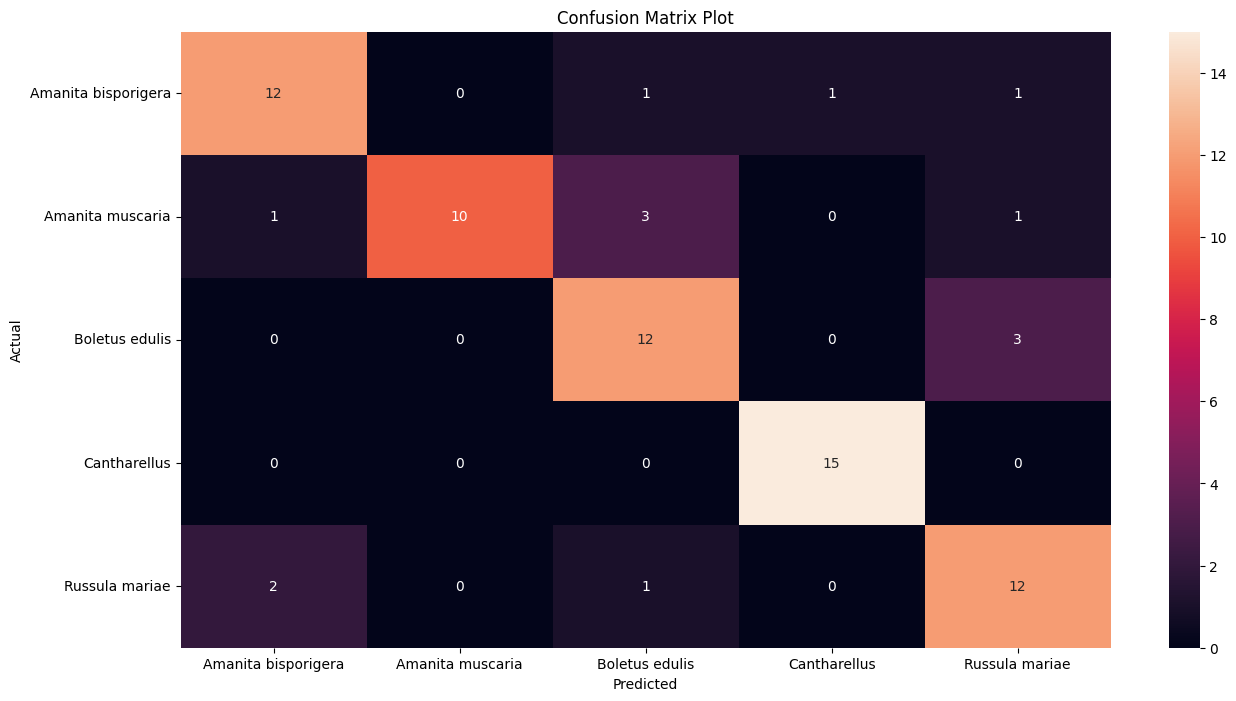

In [ ]:
labels = ['Amanita bisporigera','Amanita muscaria', 'Boletus edulis', 'Cantharellus', 'Russula mariae']
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt="g", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Plot")

In [ ]:
# Get the accuracy on the test set
acc = accuracy_score(true_labels,pred)
print(f'# Accuracy on the test set: {acc * 100:.2f}%')

# Accuracy on the test set: 81.33%


In [ ]:
# Menggunakan model untuk melakukan prediksi pada data uji
mushroom_acc = np.arange(6).astype('float64')

for i in range(5) :
    mushroom_acc[i] = cm[i,i] / sum(cm[i]) * 100
    mushroom_acc[i] = round(mushroom_acc[i], 2)

#akurasi keseluruhan
mushroom_acc[5] = round(accuracy_score(true_labels, pred) *100)
mushroom_acc

array([ 80.  ,  66.67,  80.  , 100.  ,  80.  ,  81.  ])

In [ ]:
df_accuracy = pd.DataFrame({"Label":["Amanita bisporigera","Amanita muscaria", "Boletus edulis", "Cantharellus", "Russula mariae","Total"], "Accuracy":palm_acc}).set_index("Label")
df_accuracy

print('Classification Report')
print(classification_report(true_labels, pred, target_names=labels))

Classification Report
                     precision    recall  f1-score   support

Amanita bisporigera       0.80      0.80      0.80        15
   Amanita muscaria       1.00      0.67      0.80        15
     Boletus edulis       0.71      0.80      0.75        15
       Cantharellus       0.94      1.00      0.97        15
     Russula mariae       0.71      0.80      0.75        15

           accuracy                           0.81        75
          macro avg       0.83      0.81      0.81        75
       weighted avg       0.83      0.81      0.81        75

